2.5.0
          ID Emotion                                               Text
0  399172782   angry  Ел жаңалықтарына келсек, Өскемен, Алматы, Қара...
1  399172782   angry  Олар үйіржұлдыздың тығыздығы жоғары өзек өңірі...
2  399172782   angry  Оқуымды жақсы бағамен бітіріп, өзімнің туып өс...
3  399172782   angry  Егер карта бетіне қарап, геофизикалық өлшеммен...
4  399172782   angry                  Жылдық орташа табыстарыңыз қанша?
[[56 68 51 56 59 59]
 [39 70 45 61 57 51]
 [52 56 54 58 67 49]
 [53 37 51 70 63 59]
 [51 44 48 61 58 56]
 [38 49 48 53 48 63]]
              precision    recall  f1-score   support

       angry       0.19      0.16      0.18       349
        fear       0.22      0.22      0.22       323
       happy       0.18      0.16      0.17       336
     neutral       0.19      0.21      0.20       333
         sad       0.16      0.18      0.17       318
    surprise       0.19      0.21      0.20       299

    accuracy                           0.19      1958
 

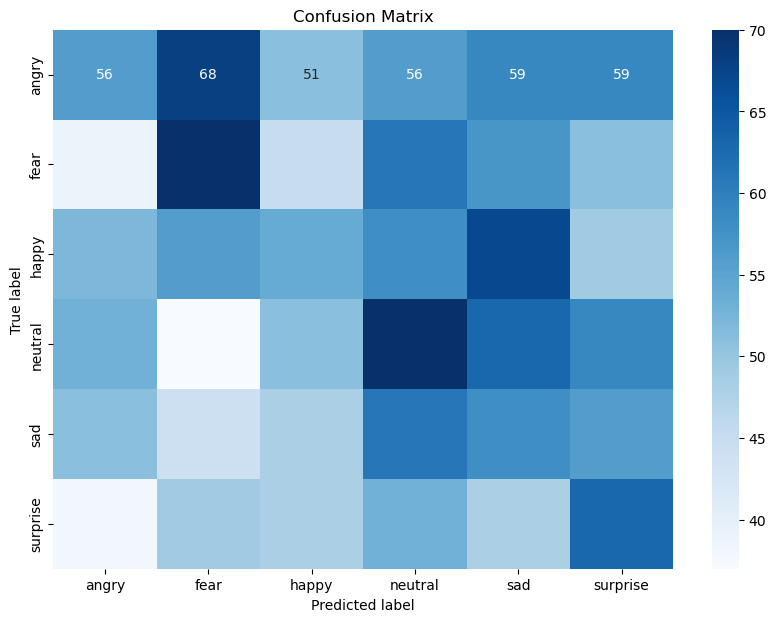

In [ ]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



import torch
print(torch.__version__)

# Folder containing the text files
folder_path = '399172782/train'  # Update this path

# Lists to hold the extracted data
ids = []
emotions = []
texts = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        # Split the filename by underscores to extract components
        parts = filename.split('_')
        if len(parts) == 3:
            # Extract the ID, emotion, and unique identifier
            id_ = parts[0]
            emotion = parts[1]
            
            # Open the file and read its content
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                text = file.read().strip()  # Read and strip any extra whitespace
            
            # Append the data to lists
            ids.append(id_)
            emotions.append(emotion)
            texts.append(text)

# Create a DataFrame
df = pd.DataFrame({
    'ID': ids,
    'Emotion': emotions,
    'Text': texts
})

# Display the DataFrame
# print(df['Text'].head().values)
print(df.head())

# Optional: Save the DataFrame to a CSV file if needed
df.to_csv('emotion_text_data.csv', index=False, encoding='utf-8')


# Preprocessing
df['Text'] = df['Text'].str.replace('[^а-яА-ЯёЁ0-9\s]', '', regex=True).str.lower()

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Emotion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Load the tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the text
# encodings = tokenizer(
#    df['Text'].tolist(),  # Convert the 'Text' column to a list
#    padding=True,         # Pad to the longest sequence
#    truncation=True,      # Truncate to the max length
#    return_tensors='pt'  # Return as PyTorch tensors
#)

# Print the encoded outputs
#print(encodings)

# If you also want to encode emotions, you can map them to integer labels
#emotion_to_id = {emotion: idx for idx, emotion in enumerate(df['Emotion'].unique())}
#df['EmotionID'] = df['Emotion'].map(emotion_to_id)

# Print the updated DataFrame
# print(df[['ID', 'Emotion', 'EmotionID']])



# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=df['Emotion'].unique())
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Emotion'].unique(), yticklabels=df['Emotion'].unique())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()



In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



import torch
print(torch.__version__)

# Folder containing the text files
folder_path = '805570882/train'  # Update this path

# Lists to hold the extracted data
ids = []
emotions = []
texts = []

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        # Split the filename by underscores to extract components
        parts = filename.split('_')
        if len(parts) == 3:
            # Extract the ID, emotion, and unique identifier
            id_ = parts[0]
            emotion = parts[1]
            
            # Open the file and read its content
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                text = file.read().strip()  # Read and strip any extra whitespace
            
            # Append the data to lists
            ids.append(id_)
            emotions.append(emotion)
            texts.append(text)

# Create a DataFrame
df = pd.DataFrame({
    'ID': ids,
    'Emotion': emotions,
    'Text': texts
})

# Display the DataFrame
# print(df['Text'].head().values)
print(df.head())

# Optional: Save the DataFrame to a CSV file if needed
df.to_csv('emotion_text_data2.csv', index=False, encoding='utf-8')




# Load the tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize the text
# encodings = tokenizer(
#    df['Text'].tolist(),  # Convert the 'Text' column to a list
#    padding=True,         # Pad to the longest sequence
#    truncation=True,      # Truncate to the max length
#    return_tensors='pt'  # Return as PyTorch tensors
#)

# Print the encoded outputs
#print(encodings)

# If you also want to encode emotions, you can map them to integer labels
#emotion_to_id = {emotion: idx for idx, emotion in enumerate(df['Emotion'].unique())}
#df['EmotionID'] = df['Emotion'].map(emotion_to_id)

# Print the updated DataFrame
# print(df[['ID', 'Emotion', 'EmotionID']])







2.5.0
          ID Emotion                                               Text
0  805570882   angry  Осы күнгінің баласы аласа туады, әке–шешесімен...
1  805570882   angry                  Керек болсам, маған хабарласыңыз.
2  805570882   angry  Мемлекет басшысының баспасөз хатшысы Тоқаевтың...
3  805570882   angry  Сондай–ақ, Еңбек және халықты әлеуметтік қорға...
4  805570882   angry  – Екеуміз түс ауғанға дейін жүргенде байқағаны...


In [2]:
df['Emotion'].value_counts()

Emotion
surprise    3981
neutral     3974
fear        3898
happy       3896
angry       3863
sad         3811
Name: count, dtype: int64